In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.models import load_model
from tensorflow.keras.utils import plot_model, to_categorical
size = 64

In [39]:
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((0, 1.5*max(val_loss + loss)))
    ax[1].set_ylim((0, max(val_acc + acc)))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

# MNIST

In [35]:
num_classes = 10
img_rows = img_cols = 28

In [36]:
with open('mnist/images_trn.bin', 'rb') as read_binary:
    x_trn = np.fromfile(read_binary, dtype = np.uint8)
with open('mnist/labels_trn.bin', 'rb') as read_binary:
    y_trn = np.fromfile(read_binary, dtype = np.uint8)
with open('mnist/images_tst.bin', 'rb') as read_binary:
    x_tst = np.fromfile(read_binary, dtype = np.uint8)
with open('mnist/labels_tst.bin', 'rb') as read_binary:
    y_tst = np.fromfile(read_binary, dtype = np.uint8)
x_trn = np.array(x_trn, dtype = 'float32') / 255
x_tst = np.array(x_tst, dtype = 'float32') / 255
x_trn = x_trn.reshape(-1, 28 * 28)
x_tst = x_tst.reshape(-1, 28 * 28)
y_trn = tf.keras.utils.to_categorical(y_trn, num_classes)
y_tst = tf.keras.utils.to_categorical(y_tst, num_classes)

In [37]:
inp = Input(img_rows * img_cols) # Input layer
x = Dropout(0.3)(inp)
x = Dense(units = 32, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)
model.summary()
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])
plot_model(model, to_file = 'mnist_dense.png')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [38]:
epochs = 20
history = model.fit(x_trn, y_trn, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_tst, y_tst))
model.save('mnist/mnist_class.model')

Epoch 1/20
469/469 - 1s - loss: 0.0252 - accuracy: 0.8323 - val_loss: 0.0123 - val_accuracy: 0.9220 - 1s/epoch - 3ms/step
Epoch 2/20
469/469 - 1s - loss: 0.0140 - accuracy: 0.9094 - val_loss: 0.0104 - val_accuracy: 0.9320 - 926ms/epoch - 2ms/step
Epoch 3/20
469/469 - 1s - loss: 0.0122 - accuracy: 0.9217 - val_loss: 0.0090 - val_accuracy: 0.9432 - 955ms/epoch - 2ms/step
Epoch 4/20
469/469 - 1s - loss: 0.0109 - accuracy: 0.9294 - val_loss: 0.0083 - val_accuracy: 0.9451 - 1s/epoch - 2ms/step
Epoch 5/20
469/469 - 1s - loss: 0.0100 - accuracy: 0.9367 - val_loss: 0.0076 - val_accuracy: 0.9511 - 969ms/epoch - 2ms/step
Epoch 6/20
469/469 - 1s - loss: 0.0095 - accuracy: 0.9392 - val_loss: 0.0073 - val_accuracy: 0.9519 - 970ms/epoch - 2ms/step
Epoch 7/20
469/469 - 1s - loss: 0.0088 - accuracy: 0.9436 - val_loss: 0.0069 - val_accuracy: 0.9554 - 988ms/epoch - 2ms/step
Epoch 8/20
469/469 - 1s - loss: 0.0084 - accuracy: 0.9458 - val_loss: 0.0064 - val_accuracy: 0.9585 - 1s/epoch - 2ms/step
Epoch 9/2

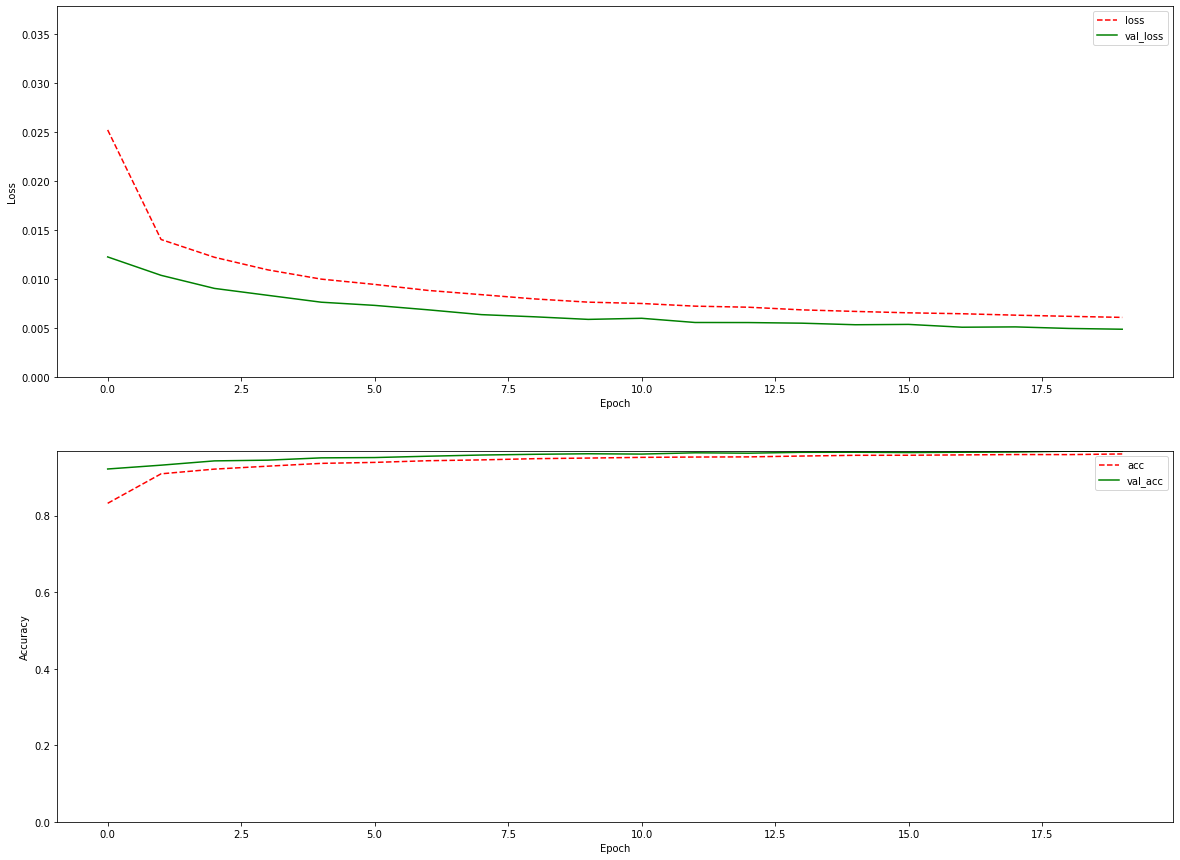

In [40]:
one_plot(history.history['loss'], history.history['val_loss'],
         history.history['accuracy'], history.history['val_accuracy'])

# Functions

In [41]:
num_classes = 6
img_rows = img_cols = 64

In [42]:
def train_test_load(path_to_x_train, path_to_y_train, path_to_x_test, path_to_y_test, 
                    train_size, test_size, image_rows, image_cols):
    file_train = open(path_to_x_train, 'rb')
    file_lable_train = open(path_to_y_train, 'rb')
    
    mas_from_file = np.fromfile(file_train)
    print(mas_from_file.shape)
    train_matrices = []
    for i in range(train_size):
        train_matrices.append(mas_from_file[image_rows*image_cols*(i):image_rows*image_cols*(i+1)].reshape((image_rows,image_cols)))
    train_labels = np.fromfile(file=file_lable_train, dtype=np.int_)
    ##############################################################
    file_test = open(path_to_x_test, 'rb')
    file_lable_test = open(path_to_y_test, 'rb')
    
    mas_from_file = np.fromfile(file_test)
    test_matrices = []
    for i in range(test_size):
        test_matrices.append(mas_from_file[image_rows*image_cols*(i):image_rows*image_cols*(i+1)].reshape((image_rows,image_cols)))
    test_labels = np.fromfile(file=file_lable_test, dtype=np.int_)
    
    file_train.close()
    file_lable_train.close()
    file_test.close()
    file_lable_test.close()
    
    train_matrices = np.array(train_matrices, dtype=np.float64).reshape(-1, image_rows*image_cols) / 255
    train_labels = to_categorical(np.array(train_labels))
    test_matrices = np.array(test_matrices, dtype=np.float64).reshape(-1, image_rows*image_cols) / 255
    test_labels = to_categorical(np.array(test_labels))
    return train_matrices, train_labels, test_matrices, test_labels

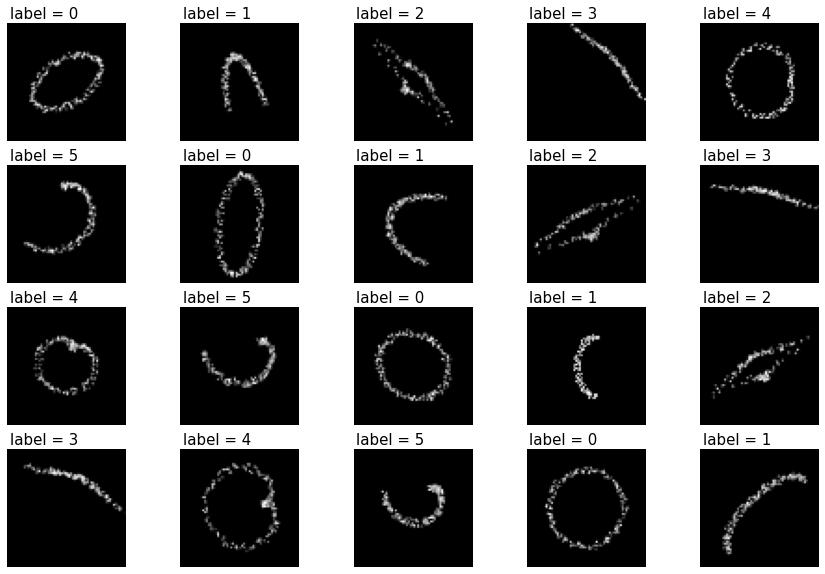

In [43]:
file_name_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_train = open(file_name_train, 'rb')
file_lable_train = open(file_lable_train, 'rb')
fig, ax = plt.subplots(4,5, figsize=(15,10))
mas_from_file = np.fromfile(file_train)
matrices = []
for i in range(41):
    matrices.append(mas_from_file[64*64*(i):64*64*(i+1)].reshape((64,64)))

labels = np.fromfile(file=file_lable_train, dtype=np.int_)
for i in range(4):
    for j in range(5):
        ax[i][j].imshow(matrices[i*5+j], cmap = 'gray')
        ax[i][j].axis('off')
        ax[i][j].text(1, -3, f'label = {labels[i*5+j]}', size=15)
        
file_train.close()
file_lable_train.close()

(14745600,)


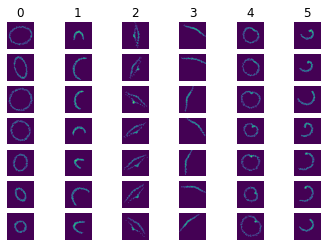

In [53]:
train_size, test_size = 600*6, 100*6
x_train, y_train, x_test, y_test = train_test_load('data_train.bin', 'label_train.bin', 
                                                                           'data_test.bin', 'label_test.bin',
                                                                           train_size, test_size, img_rows, img_cols)


classes = list(np.arange(6))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.where(y_train.reshape((600*6, 6)) == 1)[1] == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((x_train[idx]*255).reshape((64, 64)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [50]:
img_rows = img_cols = 64
inp = Input(img_rows * img_cols) # Входной слой
x = Dropout(0.3)(inp)
x = Dense(units = 32, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)
model.summary()
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])
plot_model(model, to_file = 'mnist_dense.png')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dropout_5 (Dropout)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                131104    
                                                                 
 dense_9 (Dense)             (None, 6)                 198       
                                                                 
Total params: 131,302
Trainable params: 131,302
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
epochs = 20
history = model.fit(x_train, y_train, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_test, y_test))
model.save('6_class.model')

Epoch 1/20
29/29 - 1s - loss: 0.1198 - accuracy: 0.6064 - val_loss: 0.0944 - val_accuracy: 0.7550 - 834ms/epoch - 29ms/step
Epoch 2/20
29/29 - 0s - loss: 0.0737 - accuracy: 0.7939 - val_loss: 0.0600 - val_accuracy: 0.8283 - 190ms/epoch - 7ms/step
Epoch 3/20
29/29 - 0s - loss: 0.0462 - accuracy: 0.8683 - val_loss: 0.0420 - val_accuracy: 0.8650 - 270ms/epoch - 9ms/step
Epoch 4/20
29/29 - 0s - loss: 0.0321 - accuracy: 0.9078 - val_loss: 0.0328 - val_accuracy: 0.8967 - 203ms/epoch - 7ms/step
Epoch 5/20
29/29 - 0s - loss: 0.0240 - accuracy: 0.9344 - val_loss: 0.0267 - val_accuracy: 0.9167 - 201ms/epoch - 7ms/step
Epoch 6/20
29/29 - 0s - loss: 0.0183 - accuracy: 0.9578 - val_loss: 0.0223 - val_accuracy: 0.9367 - 193ms/epoch - 7ms/step
Epoch 7/20
29/29 - 0s - loss: 0.0147 - accuracy: 0.9675 - val_loss: 0.0195 - val_accuracy: 0.9467 - 196ms/epoch - 7ms/step
Epoch 8/20
29/29 - 0s - loss: 0.0120 - accuracy: 0.9756 - val_loss: 0.0169 - val_accuracy: 0.9533 - 199ms/epoch - 7ms/step
Epoch 9/20
29/2

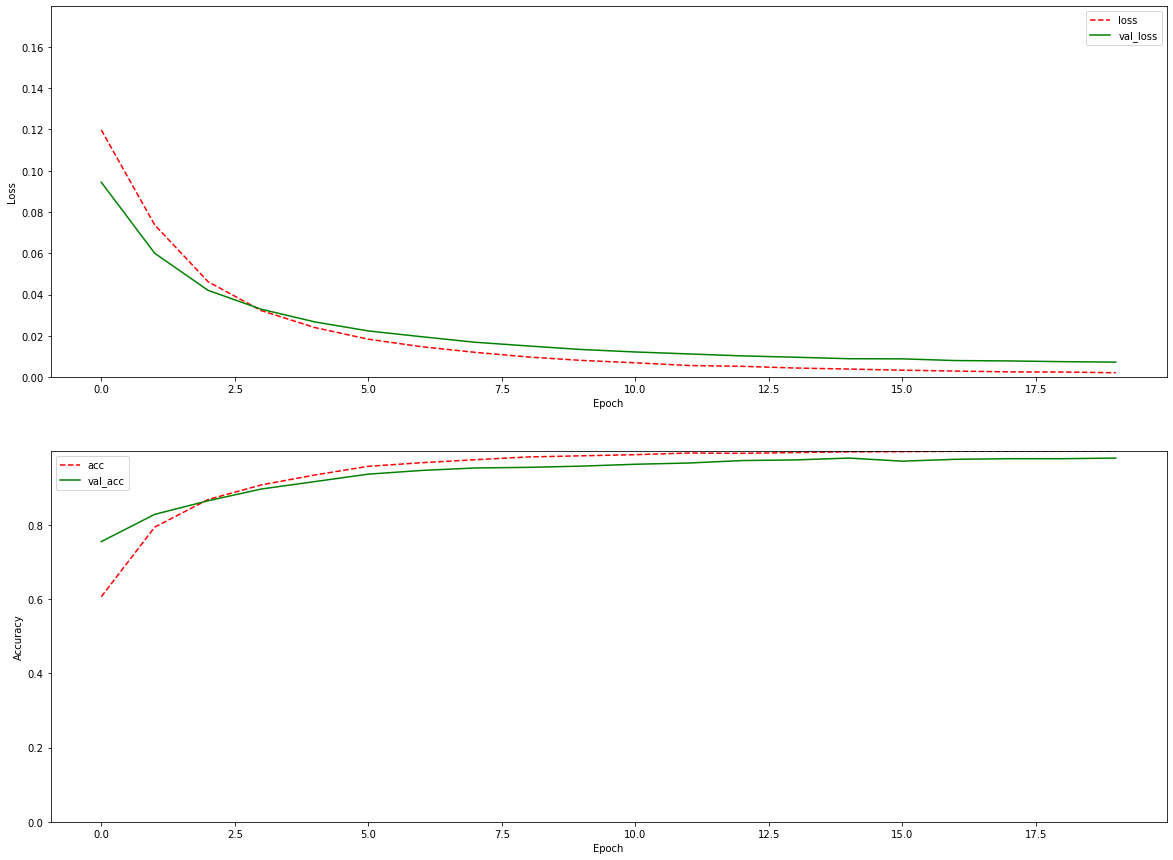

In [52]:
one_plot(history.history['loss'], history.history['val_loss'],
         history.history['accuracy'], history.history['val_accuracy'])

In [ ]:
model = load_model('6_class.model')

In [ ]:
y_pred = model.predict(test_matrices)
predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
n_of_labels = len(predicted_labels)
test_labels_1 = np.where(test_labels.reshape((100*6, 6)) == 1)[1]
n_of_true_labels = predicted_labels[predicted_labels == test_labels_1].shape[0]

classes_true_distribution = [[i, predicted_labels[(predicted_labels == test_labels_1) & (predicted_labels == i)].shape[0]] 
                             for i in range(num_classes)]
classes_error_with = {
    i: predicted_labels[(predicted_labels != test_labels_1) & (test_labels_1 == i)]
    for i in range(num_classes)
}
classes_error_with

In [ ]:
for x, num in classes_true_distribution:
    plt.bar(x, num)

In [ ]:
fig, ax = plt.subplots(num_classes, 1, figsize=(10,25))
for i, num in enumerate(classes_error_with.values()):
    ax[i].bar([x for x in range(num_classes)], [num[num == x].shape[0] for x in range(num_classes)])
    ax[i].set_title(f'Which classes {i} one errored with')